## Clean data 

*** NAMING CONVENTION ***


  * Suicide_Mortality_Rate_Census_Tracts.csv: columns end with **sui**
  
  * 'Physical_Health_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv': columns end with **phy**
  
  * 'Drug_Poisoning_or_Overdose_involving_Rx_Opioid_Analgesic_or_Heroin_Mortality_Rate_Census_Tract.csv': ends with **dru**
  
  * 'Mental_Health_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv': ends with **men**
  
  * 'Health_Status_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv': ends with **hea**
  
  * 'Delayed_Medical_Care_in_Adults_%24__CDPHE_Community_Level_Estimates_Census_Tracts.csv': ends with **delay**


In [75]:
import pandas as pd
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
os.listdir()  ## list all the data source

['Suicide_Mortality_Rate_Census_Tracts.csv',
 'Physical_Health_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv',
 'Untitled.ipynb',
 'Drug_Poisoning_or_Overdose_involving_Rx_Opioid_Analgesic_or_Heroin_Mortality_Rate_Census_Tract.csv',
 'Mental_Health_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv',
 'Health_Status_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv',
 '.ipynb_checkpoints',
 'Delayed_Medical_Care_in_Adults_%24__CDPHE_Community_Level_Estimates_Census_Tracts.csv']

In [29]:
delay = pd.read_csv('Delayed_Medical_Care_in_Adults_%24__CDPHE_Community_Level_Estimates_Census_Tracts.csv')
phy = pd.read_csv('Physical_Health_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv')
dru = pd.read_csv('Drug_Poisoning_or_Overdose_involving_Rx_Opioid_Analgesic_or_Heroin_Mortality_Rate_Census_Tract.csv')
men = pd.read_csv('Mental_Health_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv')
hea = pd.read_csv('Health_Status_in_Adults__CDPHE_Community_Level_Estimates_Census_Tracts.csv')

sui = pd.read_csv('Suicide_Mortality_Rate_Census_Tracts.csv')

In [30]:
sui.columns, sui.shape

(Index(['OBJECTID', 'TRACT_FIPS', 'TRACT_NAME', 'COUNTY_NAME',
        'SUICIDE_ADJRATE', 'SUICIDE_L95CI', 'SUICIDE_U95CI',
        'SUICIDE_STATEADJRATE', 'SUICIDE_SL95CI', 'SUICIDE_SU95CI',
        'SUICIDE_DISPLAY'],
       dtype='object'), (1249, 11))

In [31]:
phy.columns, phy.shape

(Index(['OBJECTID', 'FIPS', 'NAME', 'COUNTY', 'HSR', 'PHYSH', 'POPOVER18',
        'MAP_SYMBOL', 'CTYREG_EST', 'STATE_AVG', 'HSR_SYMBOL', 'MCONFINT'],
       dtype='object'), (1249, 12))

In [32]:
dru.columns, dru.shape

(Index(['OBJECTID', 'TRACT_FIPS', 'TRACT_NAME', 'COUNTY_NAME',
        'POD_DEATH_ADJRATE', 'POD_DEATH_L95CI', 'POD_DEATH_U95CI',
        'POD_DEATH_STATEADJRATE', 'POD_DEATH_STATEL95CI',
        'POD_DEATH_STATEU95CI', 'POD_DISPLAY'],
       dtype='object'), (1249, 11))

In [25]:
men.columns, men.shape

(Index(['OBJECTID', 'FIPS', 'NAME', 'COUNTY', 'HSR', 'POPOVER18', 'MAP_SYMBOL',
        'CTYREG_EST', 'STATE_AVG', 'HSR_SYMBOL', 'MNTLD', 'MCONFINT'],
       dtype='object'), (1249, 12))

In [33]:
delay.columns, delay.shape

(Index(['OBJECTID', 'FIPS', 'NAME', 'COUNTY', 'HSR', 'MAP_SYMBOL', 'CTYREG_EST',
        'STATE_AVG', 'POPOVER18', 'HSR_SYMBOL', 'DELMCC', 'MCONFINT'],
       dtype='object'), (1249, 12))

In [34]:
hea.columns, hea.shape

(Index(['OBJECTID', 'FIPS', 'NAME', 'COUNTY', 'HSR', 'FPHLTH', 'POPOVER18',
        'MAP_SYMBOL', 'CTYREG_EST', 'STATE_AVG', 'HSR_SYMBOL', 'MCONFINT'],
       dtype='object'), (1249, 12))

In [28]:
#heal.FPHLTH

In [81]:
common_col = ['NAME', 'COUNTY', 'HSR', 'FIPS', 'TRACT_FIPS', 'OBJECTID']

In [82]:
def clean_columns(df, myname):
    my_col_to_drop = [i for i in common_col if i in df.columns]
    df_new = df.drop(my_col_to_drop, axis = 1)
    df_new.rename(columns=lambda x: x+'_' + str(myname), inplace=True)
    
    ## merge renamed df and original FIPS column 
    if 'FIPS' in df.columns:
        df_merge = pd.concat([df_new, pd.DataFrame(df['FIPS']).reset_index(drop = True)], axis =1)
        
    else:
        df_merge = pd.concat([df_new, pd.DataFrame(df['TRACT_FIPS']).reset_index(drop = True)], axis =1)
        df_merge.rename({'TRACT_FIPS':'FIPS'}, axis = 1, inplace = True)
    return df_merge


In [83]:
df_new = clean_columns(dru, 'dru')

In [84]:
#pd.concat([df_new, dru.reset_index(drop = True)], axis = 1)

In [85]:
new_df = []
for df, name in zip([delay, dru, hea, men, phy, sui], ['delay', 'dru', 'hea', 'men', 'phy', 'sui']):
    new_df.append(clean_columns(df, name))

In [86]:
new_df[0].head()

,MAP_SYMBOL_delay,CTYREG_EST_delay,STATE_AVG_delay,POPOVER18_delay,HSR_SYMBOL_delay,DELMCC_delay,MCONFINT_delay,FIPS
0,Second Quintile,County/Regional Estimate 15.2% (95% C.I.: 11.6...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),2932,Second Quintile,11.4,95% C.I.: 10.6 - 12.3,8043979000
1,Fourth Quintile,County/Regional Estimate 15.6% (95% C.I.: 11.8...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),3030,Fourth Quintile,14.7,95% C.I.: 13.7 - 15.9,8045951600
2,Second Quintile,County/Regional Estimate 11.8% (95% C.I.: 10 -...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),91,Middle Quintile,11.6,95% C.I.: 11.1 - 12,8069002803
3,Lowest Quintile,County/Regional Estimate 13.2% (95% C.I.: 4.8 ...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),4339,Second Quintile,9.3,95% C.I.: 8.1 - 11.2,8125963200
4,Lowest Quintile,County/Regional Estimate 11.8% (95% C.I.: 10 -...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),942,Lowest Quintile,8.3,95% C.I.: 7.9 - 8.6,8069002401


In [87]:
for i in new_df:
    if 'FIPS' not in i.columns:
        print(i)

## Join into one frame

In [88]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='FIPS'), new_df)


In [89]:
df_final.head(3)

,MAP_SYMBOL_delay,CTYREG_EST_delay,STATE_AVG_delay,POPOVER18_delay,HSR_SYMBOL_delay,DELMCC_delay,MCONFINT_delay,FIPS,TRACT_NAME_dru,COUNTY_NAME_dru,...,MCONFINT_phy,TRACT_NAME_sui,COUNTY_NAME_sui,SUICIDE_ADJRATE_sui,SUICIDE_L95CI_sui,SUICIDE_U95CI_sui,SUICIDE_STATEADJRATE_sui,SUICIDE_SL95CI_sui,SUICIDE_SU95CI_sui,SUICIDE_DISPLAY_sui
0,Second Quintile,County/Regional Estimate 15.2% (95% C.I.: 11.6...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),2932,Second Quintile,11.4,95% C.I.: 10.6 - 12.3,8043979000,"Census Tract 9790, Fremont County, Colorado",FREMONT,...,95% C.I.: 12.1 - 14.1,"Census Tract 9790, Fremont County, Colorado",FREMONT,5.276,0.0027,21.581,19.48,18.95,20.01,Not Different Than State Average
1,Fourth Quintile,County/Regional Estimate 15.6% (95% C.I.: 11.8...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),3030,Fourth Quintile,14.7,95% C.I.: 13.7 - 15.9,8045951600,"Census Tract 9516, Garfield County, Colorado",GARFIELD,...,95% C.I.: 5.7 - 7.1,"Census Tract 9516, Garfield County, Colorado",GARFIELD,NaN,NaN,NaN,19.48,18.95,20.01,No Events or Data Suppressed
2,Second Quintile,County/Regional Estimate 11.8% (95% C.I.: 10 -...,State Estimate 12.9% (95% C.I.: 12.4 - 13.3),91,Middle Quintile,11.6,95% C.I.: 11.1 - 12,8069002803,"Census Tract 28.03, Larimer County, Colorado",LARIMER,...,95% C.I.: 5.4 - 6.1,"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.000,0.0000,0.000,19.48,18.95,20.01,Lower Than State Average


In [95]:
df_final.POD_DEATH_ADJRATE_dru.describe()

count    678.000000
mean       9.188778
std       12.551616
min        0.000000
25%        0.000000
50%        0.000000
75%       15.802375
max       72.098300
Name: POD_DEATH_ADJRATE_dru, dtype: float64

In [97]:
df_final.SUICIDE_ADJRATE_sui.describe()

count    898.000000
mean      22.977716
std       14.114520
min        0.000000
25%       14.152750
50%       21.213000
75%       30.383750
max      124.971000
Name: SUICIDE_ADJRATE_sui, dtype: float64

In [90]:
corr = df_final.corr()

In [91]:
plt.rcParams['figure.figsize'] = (10, 10)

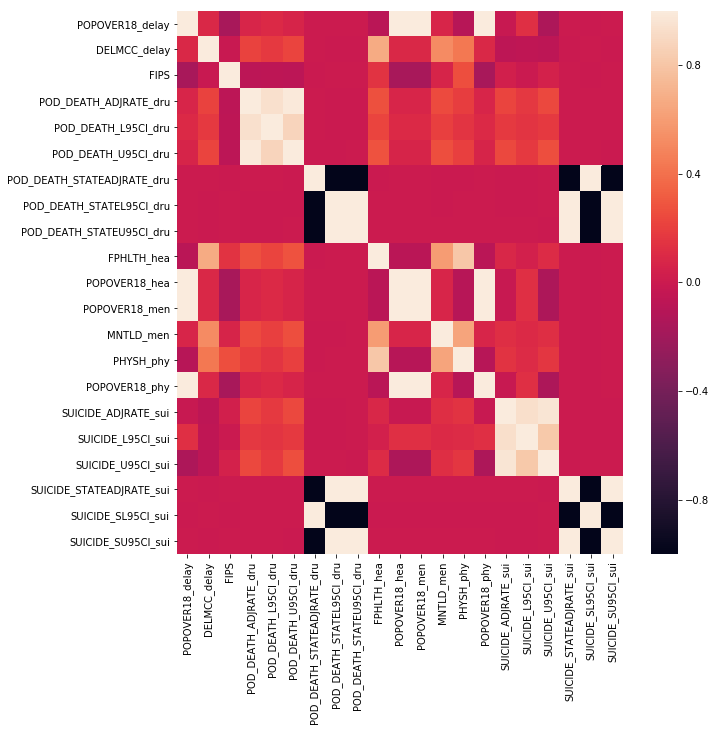

In [92]:
sns.heatmap(corr)

## Remove collinear columns: upper and lower Confidence interval

In [98]:
remove_col = [col for col in df_final.columns if '95' in col]

In [100]:
remove_col = remove_col + ['FIPS']

In [101]:
df_final_rm = df_final.drop(remove_col, axis = 1)

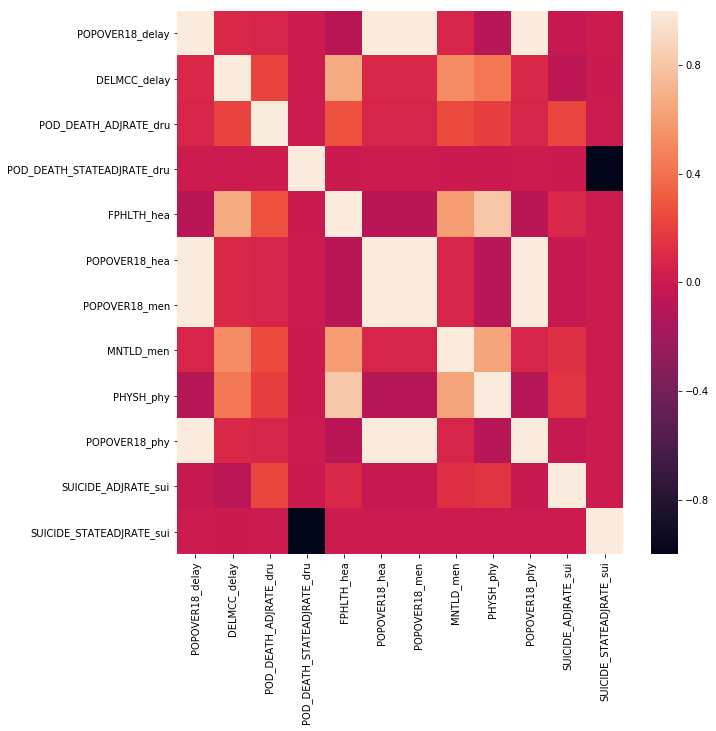

In [103]:
corr = df_final_rm.corr()
sns.heatmap(corr)

In [104]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-macosx) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-macosx) (build 25.121-b15, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/y0/zy0vhqwx5bzb9zjt2fswnrf40000gn/T/tmp1gf5hwkk
  JVM stdout: /var/folders/y0/zy0vhqwx5bzb9zjt2fswnrf40000gn/T/tmp1gf5hwkk/h2o_xiguo_started_from_python.out
  JVM stderr: /var/folders/y0/zy0vhqwx5bzb9zjt2fswnrf40000gn/T/tmp1gf5hwkk/h2o_xiguo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,3 months and 5 days
H2O cluster name:,H2O_from_python_xiguo_8arlt8
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [105]:
hdf = h2o.H2OFrame(df_final_rm)

/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [109]:
hdf.columns_by_type('categorical')

[0.0,
 1.0,
 2.0,
 4.0,
 6.0,
 8.0,
 11.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 21.0,
 22.0,
 23.0,
 25.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 34.0,
 37.0]

In [113]:
for i in hdf.columns_by_type('numeric'):
    print(i, hdf.col_names[int(i)])


3.0 POPOVER18_delay
5.0 DELMCC_delay
9.0 POD_DEATH_ADJRATE_dru
10.0 POD_DEATH_STATEADJRATE_dru
12.0 FPHLTH_hea
13.0 POPOVER18_hea
19.0 POPOVER18_men
24.0 MNTLD_men
26.0 PHYSH_phy
27.0 POPOVER18_phy
35.0 SUICIDE_ADJRATE_sui
36.0 SUICIDE_STATEADJRATE_sui


In [119]:
df_final.to_csv('final_merge_CDPHE.csv', index = False)